<a href="https://colab.research.google.com/github/nicolejoice/MIT-504/blob/main/Time_Series_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis with ARIMA model**

# **1. Import Libraries**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# **2. Load Dataset**

In [38]:
data = pd.read_csv("Exchange Rate (Dollars).csv")


# **3. Convert month to datetime**

In [39]:
data['Date'] = pd.date_range(start='2000-01-01', periods=len(data), freq='D')
data.set_index('Date', inplace = True)

# **4. Plot the Time Series**

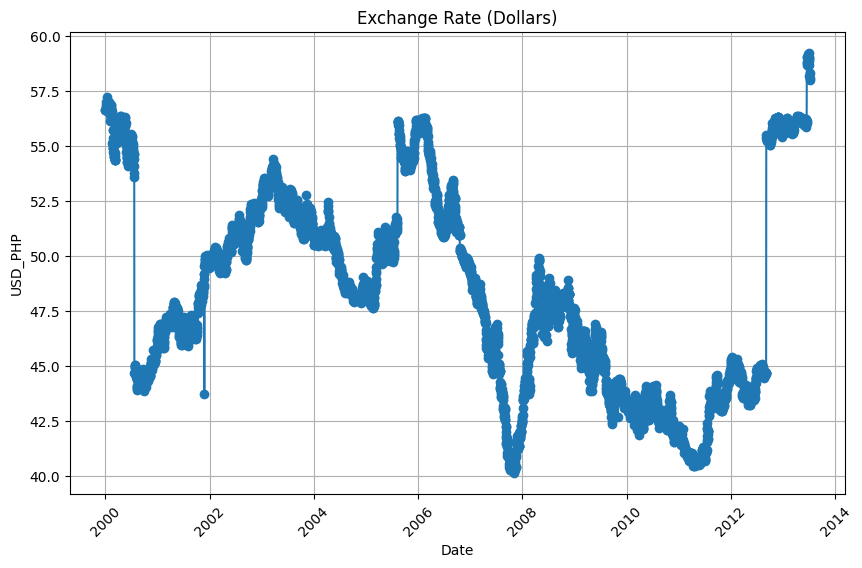

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['USD_PHP'], marker='o', linestyle='-')
plt.title('Exchange Rate (Dollars)')
plt.xlabel('Date')
plt.ylabel('USD_PHP')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **5. Decomposition**

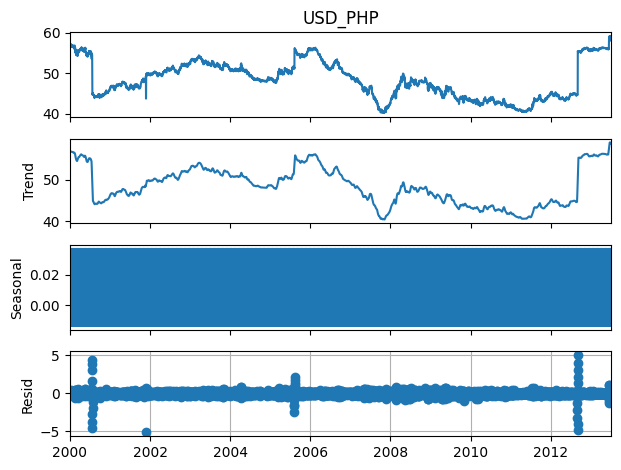

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

data['USD_PHP'].fillna(method='ffill', inplace=True)  # Forward fill missing values

result = seasonal_decompose(data['USD_PHP'], model='additive', period=12)

result.plot()
plt.grid(True)
plt.show()

# **6. Fit an ARIMA Model**

In [49]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['USD_PHP'], order=(5, 1, 0))
results = model.fit()

print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                USD_PHP   No. Observations:                 4937
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1358.803
Date:                Sat, 06 Jul 2024   AIC                           2729.606
Time:                        12:06:08   BIC                           2768.631
Sample:                    01-01-2000   HQIC                          2743.292
                         - 07-07-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1491      0.003    -48.764      0.000      -0.155      -0.143
ar.L2         -0.0288      0.015     -1.972      0.049      -0.057      -0.000
ar.L3         -0.0300      0.015     -1.992      0.0

# **7. Forecasting Future Values**

<function matplotlib.pyplot.show(close=None, block=None)>

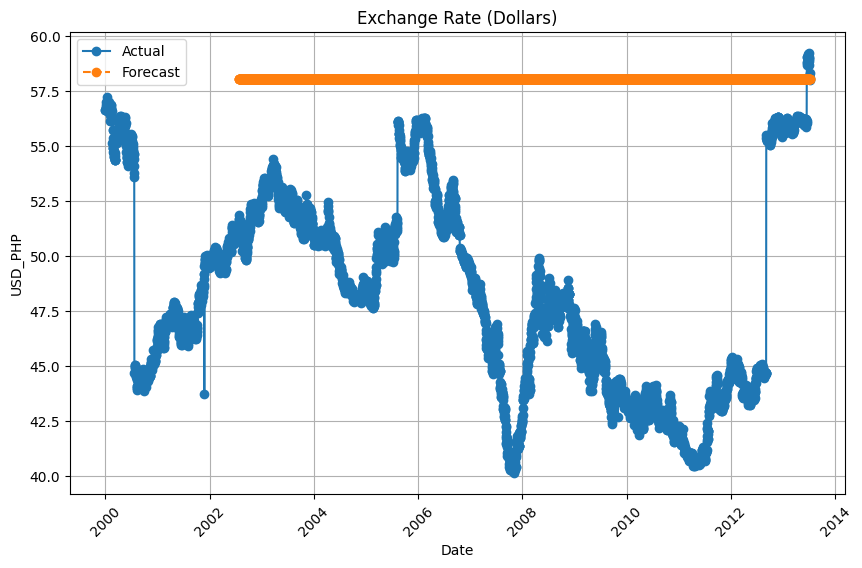

In [57]:
forecast = results.forecast(steps=4000)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['USD_PHP'], marker='o', linestyle='-', label='Actual')
plt.plot(data.index[-len(forecast):], forecast, marker='o', linestyle='--', label='Forecast')
plt.title('Exchange Rate (Dollars)')
plt.xlabel('Date')
plt.ylabel('USD_PHP')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show

# **8. Another type of plotting**

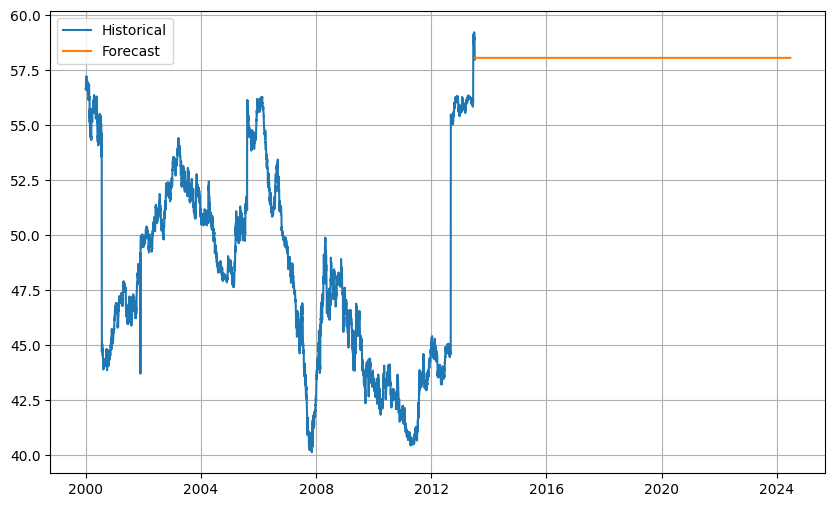

In [59]:
forecast = results.forecast(steps=4000)

plt.figure(figsize=(10, 6))
plt.plot(data.index,data['USD_PHP'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.grid(True)
plt.show()